## Análise da base de dados do censo, Ciência de Dados, Machine Learning, Naive Bayes

### BASE DE DADOS DE CENSO


Fonte: https://archive.ics.uci.edu/ml/datasets/adult

### Instalação e importação das bibliotecas necessárias

In [202]:
!pip install plotly --upgrade
!pip install streamlit
import streamlit as st
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [203]:
# Check is Link to Drive is OK
google = !if [ -d 'drive/' ]; then echo "1" ; else echo "0"; fi
if (google[0] == '0' ):
  from google.colab import drive
  drive.mount('/content/drive/')
!if [ -d 'drive/' ]; then echo "Connection to Google drive successful" ; else echo "Error to connect to Google drive"; fi
!ls "/content/drive/MyDrive/MachineLearning"

Connection to Google drive successful
Aprendizagem_Bayesiana.ipynb  datascience.jpeg
census.csv		      datascience.jpg
credit2.pkl		      Pre_Processamento_Credit_Machine_Learning_Data_Science_.ipynb
credit_data.csv		      ProcessamentoBaseCredit.ipynb
creditData.pkl		      README.md
dashboards.py		      supermarket_sales.csv
dashCredit.py


### Dados da base

In [204]:
baseCensus = pd.read_csv("/content/drive/MyDrive/MachineLearning/census.csv", sep=",") # leitura do arquivo csv
baseCensus

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [205]:
baseCensus.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [206]:
baseCensus.isnull().sum() # verrificar se existe algum valor nulo

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

In [207]:
colunas = baseCensus.columns.tolist()
print("Colunas do DataFrame:", colunas)
#colunas

Colunas do DataFrame: ['age', 'workclass', 'final-weight', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loos', 'hour-per-week', 'native-country', 'income']


In [208]:
# Verificar se a distribuição da classe objetivo,
# esta desequilibrada
np.unique(baseCensus['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

<Axes: xlabel='income', ylabel='count'>

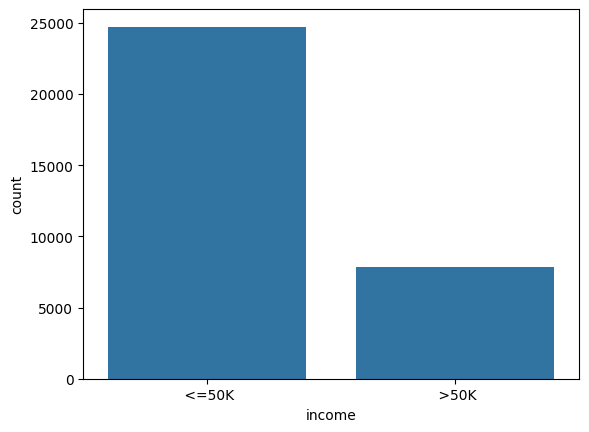

In [209]:
sns.countplot(x = baseCensus['income']) # Grafico da distribuição da classe objetivo

### Ciência de dados

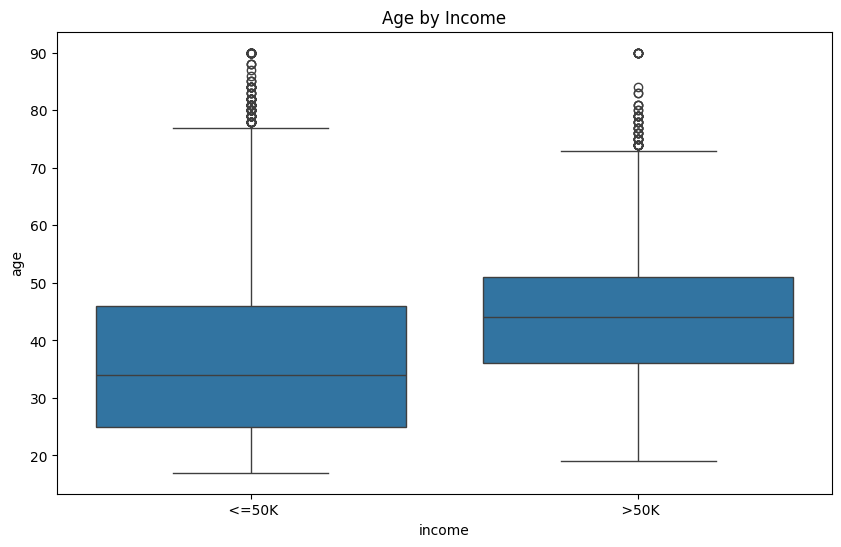

In [210]:
# Boxplot para age
plt.figure(figsize=(10, 6))
sns.boxplot(data=baseCensus, x='income', y='age')
plt.title('Age by Income')
plt.show()

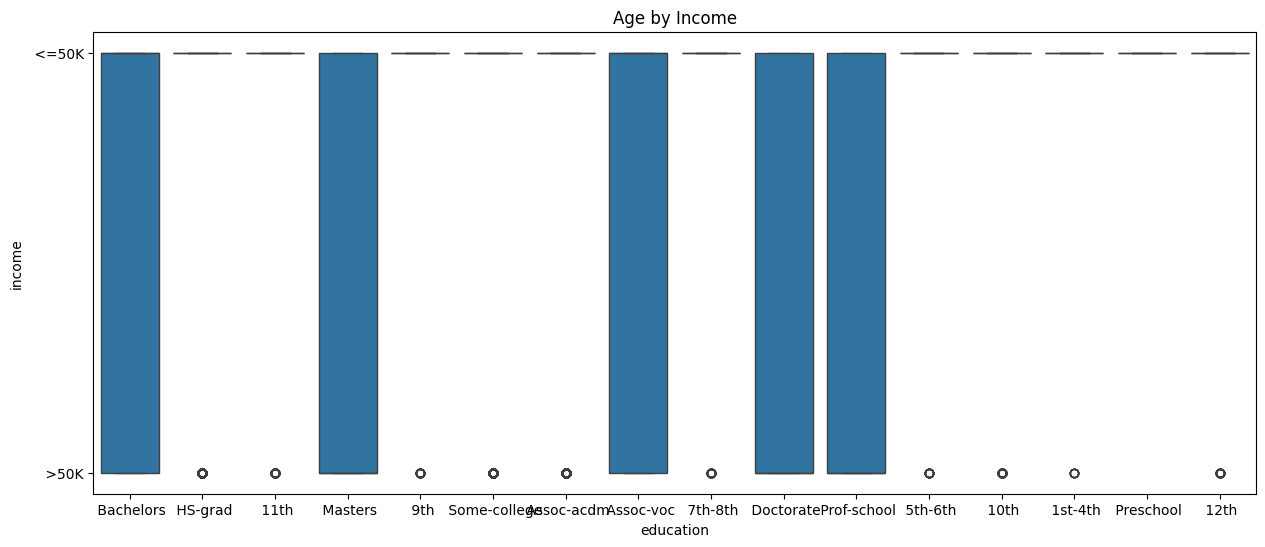

In [211]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=baseCensus, x='education', y='income')
plt.title('Age by Income')
plt.show()

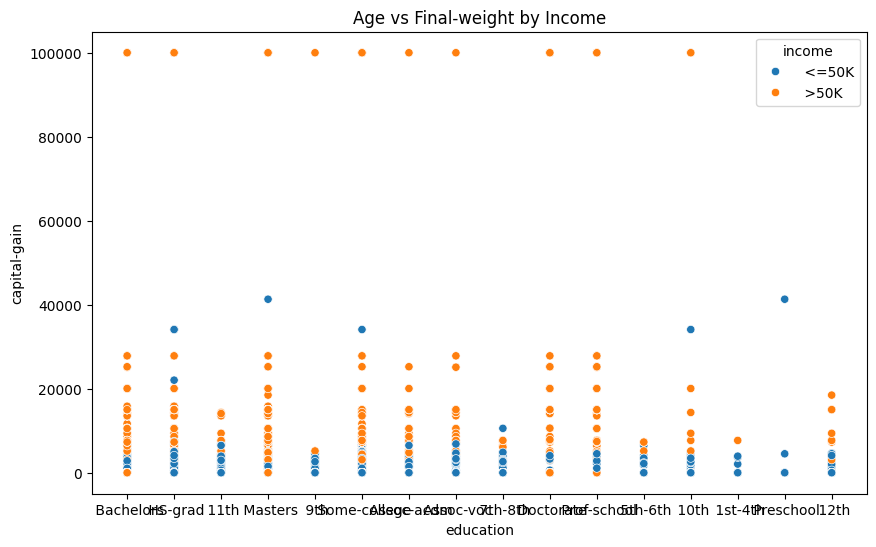

In [212]:
# Scatter plot para age vs final-weight
plt.figure(figsize=(10, 6))
sns.scatterplot(data=baseCensus, x='education', y='capital-gain', hue='income')
plt.title('Age vs Final-weight by Income')
plt.show()

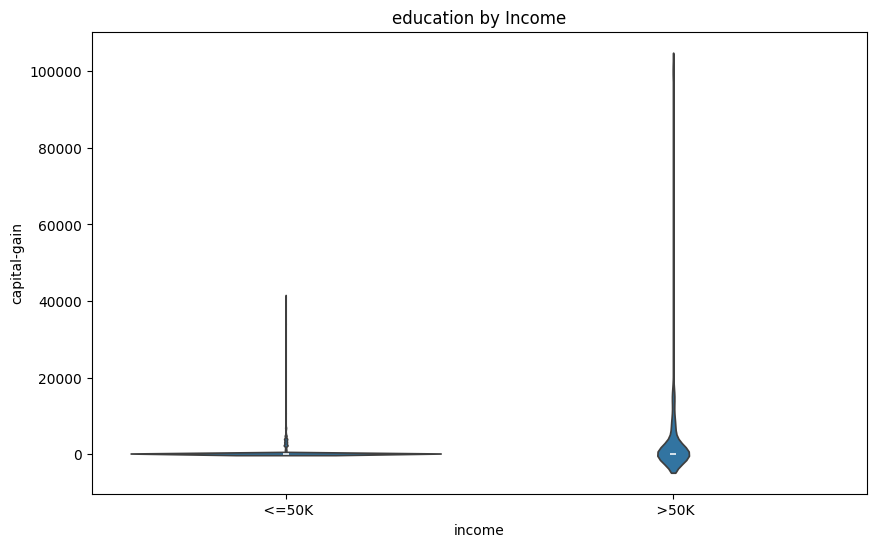

In [213]:
# Violin plot para capital-gain
plt.figure(figsize=(10, 6))
sns.violinplot(data=baseCensus, x='income', y='capital-gain')
plt.title('education by Income')
plt.show()

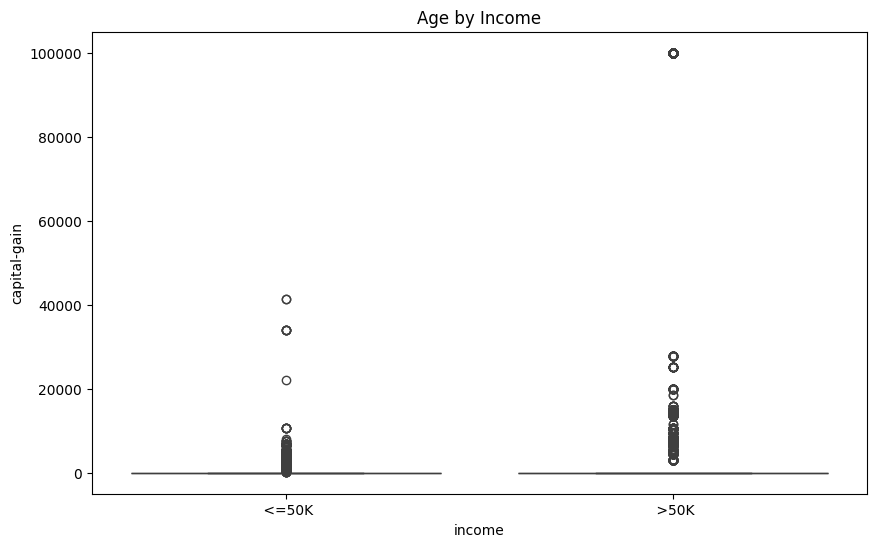

In [214]:
# Boxplot para age
plt.figure(figsize=(10, 6))
sns.boxplot(data=baseCensus, x='income', y='capital-gain')
plt.title('Age by Income')
plt.show()

(array([3.1791e+04, 5.1700e+02, 8.7000e+01, 5.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.5900e+02]),
 array([    0. ,  9999.9, 19999.8, 29999.7, 39999.6, 49999.5, 59999.4,
        69999.3, 79999.2, 89999.1, 99999. ]),
 <BarContainer object of 10 artists>)

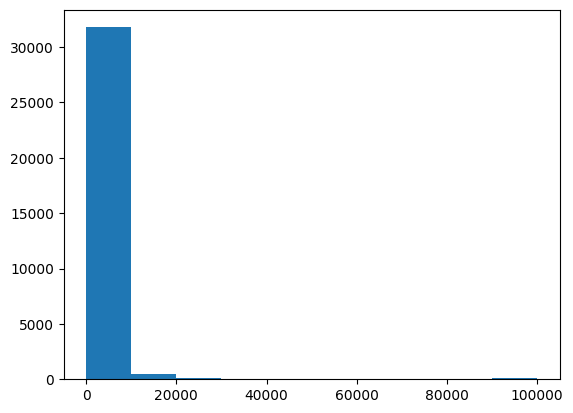

In [215]:
# grafico da capital-gaai
plt.hist(x = baseCensus['capital-gain'])

(array([3.1053e+04, 1.7000e+01, 2.1000e+01, 4.6100e+02, 7.7900e+02,
        2.0700e+02, 1.4000e+01, 0.0000e+00, 6.0000e+00, 3.0000e+00]),
 array([   0. ,  435.6,  871.2, 1306.8, 1742.4, 2178. , 2613.6, 3049.2,
        3484.8, 3920.4, 4356. ]),
 <BarContainer object of 10 artists>)

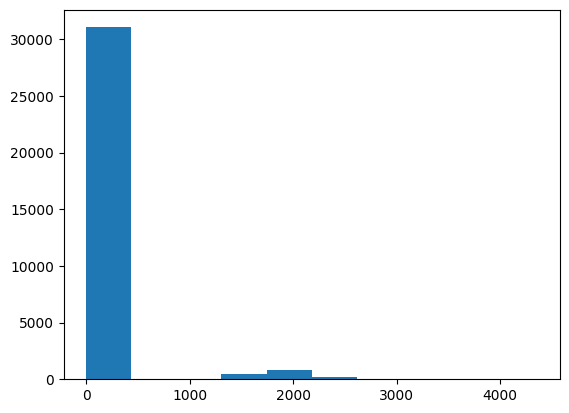

In [216]:
# grafico da educação
plt.hist(x = baseCensus['capital-loos'])

In [217]:

baseCensus['income'] = baseCensus['income'].str.strip()# Retirar espaços em branco
baseCensus['income'] = baseCensus['income'].replace({'<=50K': 0, '>50K': 1})# Substituir <=50k por 0 e >50k por 1
print(baseCensus['income'].unique())
baseCensus

[0 1]


,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [218]:
'''# Filtrando os valores <=50K
menores_50k = baseCensus[baseCensus['income'] == ' <=50K']
menores_50k'''

# Filtrando valores de idade entre 18 e 60
baseCensus = baseCensus[(baseCensus['age'] >= 18) & (baseCensus['age'] <= 60)]
baseCensus

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [219]:
#grafico = px.scatter_matrix(baseCensus, dimensions=['capital-gain', 'capital-loos', 'education'], color = 'income')

#grafico = px.scatter_matrix(baseCensus, dimensions=['capital-gain', 'capital-loos', 'education'], color ='income')
grafico = px.scatter_matrix(baseCensus, dimensions=['capital-gain', 'capital-loos', 'education', 'age', 'hour-per-week', 'education-num'], color='income')

grafico.show()

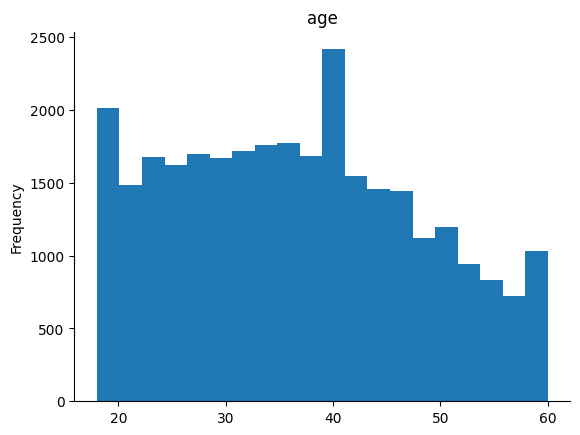

In [220]:
from matplotlib import pyplot as plt
baseCensus['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

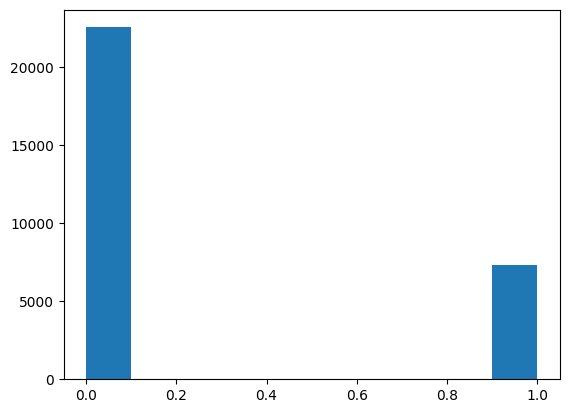

In [221]:
# grafico da idade da base completa
# a maioria esta entre 18 e 45
plt.hist(x = baseCensus['income']);

(array([ 181.,  284.,  891.,  699., 1293., 9710., 8228., 1034., 6654.,
         860.]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

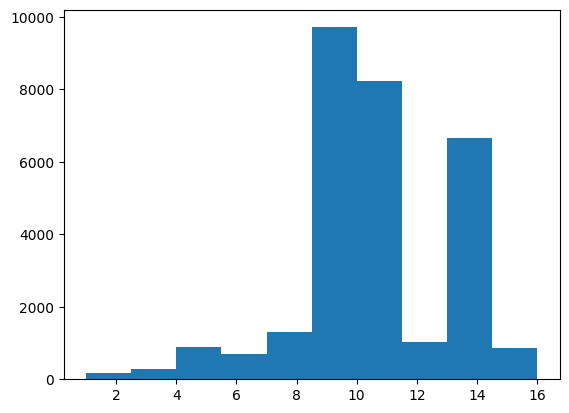

In [222]:
# grafico da educação
plt.hist(x = baseCensus['education-num'])

(array([  417.,  1600.,  1975., 16674.,  2994.,  3705.,  1731.,   421.,
          195.,   122.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

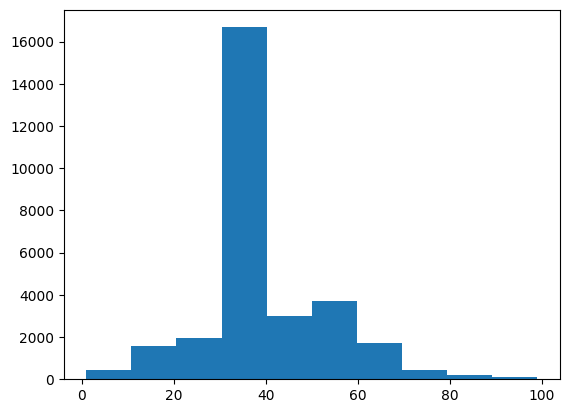

In [223]:
# grafico de horas de trabalho
plt.hist(x = baseCensus['hour-per-week'])


In [224]:
grafico = px.treemap(baseCensus, path=['workclass', 'age'])
grafico.show()

In [225]:
grafico = px.treemap(baseCensus, path=['occupation', 'relationship'])
grafico.show()

In [226]:
grafico = px.parallel_categories(baseCensus, dimensions=['education', 'income'])
grafico.show()

In [227]:
print(baseCensus['education'].nunique())
class_counts = baseCensus['education'].value_counts()

class_counts

16


education
 HS-grad         9710
 Some-college    6916
 Bachelors       5055
 Masters         1599
 Assoc-voc       1312
 Assoc-acdm      1034
 11th             919
 10th             699
 Prof-school      511
 7th-8th          472
 9th              419
 12th             374
 Doctorate        349
 5th-6th          284
 1st-4th          138
 Preschool         43
Name: count, dtype: int64

In [228]:
# Agrupar os dados por 'education' e 'income' e contar as ocorrências
grouped_data = baseCensus.groupby(['education', 'income']).size().reset_index(name='count')

# Definir o mapeamento de cores
color_discrete_map = {
    0: 'green',
    1: 'red'
}

# Criar o gráfico de barras empilhadas com cores personalizadas
fig = px.bar(grouped_data,
             x='education',
             y='count',
             color='income',
             barmode='group',
             labels={'education': 'Education', 'count': 'Count', 'income': 'Income'},
             title='Distribution of Education Levels by Income',
             color_discrete_map=color_discrete_map)

# Mostrar o gráfico
fig.show()

Filtrar os dados que possuem HS-grad na coluna education.

Dividir esses dados em dois DataFrames: um com income igual a 0 e outro com income igual a 1.

Realizar a amostragem do DataFrame maior para que o número de valores 0 e 1 seja igual.

Concatenar esses DataFrames e combiná-los de volta com o DataFrame original.

In [229]:
 # Filtrar os dados com 'HS-grad'
baseCensus['education'] = baseCensus['education'].str.strip()# Retirar espaços em branco
hs_grad_data = baseCensus.loc[baseCensus['education'] == 'HS-grad']
hs_grad_data

<ipython-input-229-9d19cce1b829>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
16,25,Self-emp-not-inc,176756,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,35,United-States,0
17,32,Private,186824,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,40,United-States,0
21,54,Private,302146,HS-grad,9,Separated,Other-service,Unmarried,Black,Female,0,0,20,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32547,43,Private,260761,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [230]:
# Dividir em dois DataFrames: um com 'income' igual a 0 e outro com 'income' igual a 1
hs_grad_0 = hs_grad_data[hs_grad_data['income'] == 0]
hs_grad_1 = hs_grad_data[hs_grad_data['income'] == 1]

In [231]:
# Realizar a amostragem para igualar o número de valores 0 e 1
if len(hs_grad_0) > len(hs_grad_1):
    hs_grad_0 = hs_grad_0.sample(len(hs_grad_1))
else:
    hs_grad_1 = hs_grad_1.sample(len(hs_grad_0))

In [232]:
# Concatenar os DataFrames de volta
balanced_hs_grad = pd.concat([hs_grad_0, hs_grad_1])
# Combinar com o DataFrame original, excluindo os dados antigos de 'HS-grad'
df_balanced = pd.concat([baseCensus[baseCensus['education'] != 'HS-grad'], balanced_hs_grad])
df_balanced

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32462,48,Self-emp-inc,185041,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,50,United-States,1
32510,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,?,1
32518,57,Local-gov,110417,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,40,United-States,1
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1


In [233]:




# Agrupar os dados por 'education' e 'income' e contar as ocorrências
grouped_data = df_balanced.groupby(['education', 'income']).size().reset_index(name='count')
# Definir o mapeamento de cores
color_discrete_map = {
    0: 'green',
    1: 'red'
}

# Criar o gráfico de barras empilhadas com cores personalizadas
fig = px.bar(grouped_data,
             x='education',
             y='count',
             color='income',
             barmode='group',
             labels={'education': 'Education', 'count': 'Count', 'income': 'Income'},
             title='Distribution of Education Levels by Income',
             color_discrete_map=color_discrete_map)

# Mostrar o gráfico
fig.show()


,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32462,48,Self-emp-inc,185041,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,50,United-States,1
32510,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,?,1
32518,57,Local-gov,110417,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,40,United-States,1
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1


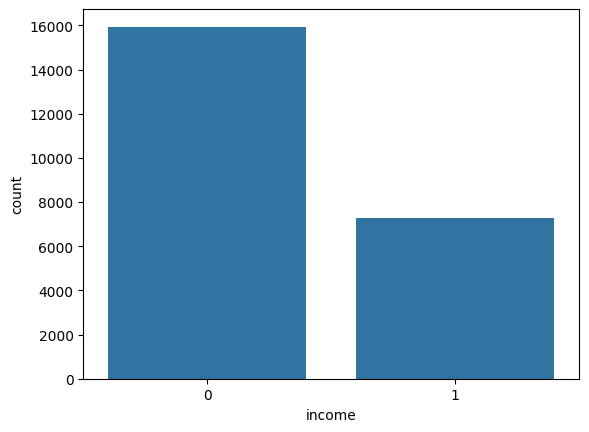

In [234]:
sns.countplot(x = df_balanced['income']) # Grafico da distribuição da classe objetivo
df_balanced

In [235]:
np.unique(df_balanced['income'], return_counts=True)

(array([0, 1]), array([15944,  7290]))

In [236]:
# Filtrar os dados com 'Some-college'
Some_college_data = df_balanced[df_balanced['education'] == 'Some-college']
# Dividir em dois DataFrames: um com 'income' igual a 0 e outro com 'income' igual a 1
Some_college_0 = Some_college_data[Some_college_data['income'] == 0]
Some_college_1 = Some_college_data[Some_college_data['income'] == 1]
print(len(Some_college_0), len(Some_college_1))
# Realizar a amostragem para igualar o número de valores 0 e 1
if len(Some_college_0) > len(Some_college_1):
    Some_college_0 = Some_college_0.sample(len(Some_college_1))
else:
    Some_college_1 = Some_college_1.sample(len(Some_college_0))
print(len(Some_college_0), len(Some_college_0))
# Concatenar os DataFrames de volta
balanced_Some_college2 = pd.concat([Some_college_0, Some_college_1])
# Combinar com o DataFrame original, excluindo os dados antigos de 'HS-grad'
df_balanced2 = pd.concat([df_balanced[df_balanced['education'] != 'Some-college'], balanced_Some_college2])
df_balanced2


5617 1299
1299 1299


,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32402,42,Private,288154,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,89,United-States,1
32440,30,Self-emp-not-inc,176185,Some-college,10,Married-spouse-absent,Craft-repair,Own-child,White,Male,0,0,60,United-States,1
32441,53,Private,304504,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,1887,45,United-States,1
32453,46,Private,42251,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,1


In [237]:
# Agrupar os dados por 'education' e 'income' e contar as ocorrências
grouped_data2 = df_balanced2.groupby(['education', 'income']).size().reset_index(name='count')
# Definir o mapeamento de cores
color_discrete_map = {
    0: 'green',
    1: 'red'
}

# Criar o gráfico de barras empilhadas com cores personalizadas
fig2 = px.bar(grouped_data2,
             x='education',
             y='count',
             color='income',
             barmode='group',
             labels={'education': 'Education', 'count': 'Count', 'income': 'Income'},
             title='Distribution of Education Levels by Income',
             color_discrete_map=color_discrete_map)

# Mostrar o gráfico
fig2.show()


<Axes: xlabel='income', ylabel='count'>

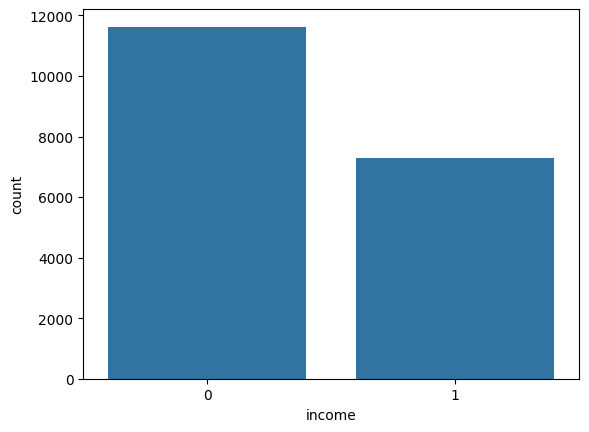

In [238]:
sns.countplot(x = df_balanced2['income']) # Grafico da distribuição da classe objetivo


In [239]:
np.unique(df_balanced2['income'], return_counts=True)

(array([0, 1]), array([11626,  7290]))

In [240]:
bachelors_data = df_balanced2[df_balanced2['education'] == 'Bachelors']

# Dividir em dois DataFrames: um com 'income' igual a 0 e outro com 'income' igual a 1
bachelors_0 = bachelors_data[bachelors_data['income'] == 0]
bachelors_1 = bachelors_data[bachelors_data['income'] == 1]

print(len(bachelors_0), len(bachelors_1))

# Realizar a amostragem para igualar o número de valores 0 e 1
if len(bachelors_0) > len(bachelors_1):
    bachelors_0 = bachelors_0.sample(len(bachelors_1))
else:
    bachelors_1 = bachelors_1.sample(len(bachelors_0))

print(len(bachelors_0), len(bachelors_1))

# Concatenar os DataFrames de volta
balanced_bachelors = pd.concat([bachelors_0, bachelors_1])

# Combinar com o DataFrame original, excluindo os dados antigos de 'Bachelors'
df_balanced2 = pd.concat([df_balanced2[df_balanced2['education'] != 'Bachelors'], balanced_bachelors])

# Agrupar os dados por 'education' e 'income' e contar as ocorrências
grouped_data = df_balanced2.groupby(['education', 'income']).size().reset_index(name='count')

# Definir o mapeamento de cores
color_discrete_map = {
    0: 'green',
    1: 'red'
}

# Criar o gráfico de barras empilhadas com cores personalizadas
fig = px.bar(grouped_data,
             x='education',
             y='count',
             color='income',
             barmode='group',
             labels={'education': 'Education', 'count': 'Count', 'income': 'Income'},
             title='Distribution of Education Levels by Income',
             color_discrete_map=color_discrete_map)

# Mostrar o gráfico
fig.show()

2970 2085
2085 2085


In [241]:
df_balanced2

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
13,32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32464,45,Self-emp-inc,173664,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,1
32533,54,Private,337992,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,1
32536,34,Private,160216,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,55,United-States,1


<Axes: xlabel='income', ylabel='count'>

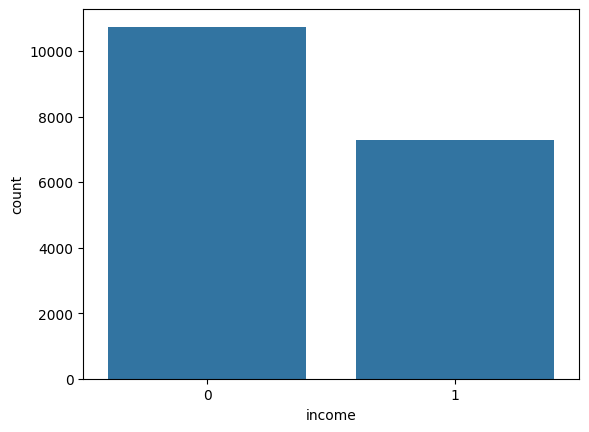

In [242]:
sns.countplot(x = df_balanced2['income']) # Grafico da distribuição da classe objetivo


In [243]:
np.unique(df_balanced2['income'], return_counts=True)

(array([0, 1]), array([10741,  7290]))

In [244]:
from google.colab import files

# Salvar o DataFrame df_balanced2 em um arquivo CSV:
df_balanced2.to_csv('df_balanced2.csv', index=False)
# Baixar o arquivo CSV no Google Colab
#files.download('df_balanced2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [245]:
df_balanced2.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week,income
count,18031.000000,1.803100e+04,18031.000000,18031.000000,18031.000000,18031.000000,18031.000000
mean,38.247629,1.915619e+05,10.505685,1626.867894,110.104154,42.417170,0.404304
std,10.952748,1.060527e+05,3.043857,9328.115323,450.121946,11.675754,0.490770
min,18.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,30.000000,1.187165e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,38.000000,1.802770e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.396455e+05,13.000000,0.000000,0.000000,48.000000,1.000000
max,60.000000,1.455435e+06,16.000000,99999.000000,3900.000000,99.000000,1.000000


In [246]:
df_balanced2.isnull().sum() # verrificar se existe algum valor nulo

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

### Divisão entre previsores e classe


In [247]:
df_balanced2.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [248]:
X_census = df_balanced2.iloc[:, 0:14].values
X_census

array([[53, ' Private', 234721, ..., 0, 40, ' United-States'],
       [37, ' Private', 284582, ..., 0, 40, ' United-States'],
       [49, ' Private', 160187, ..., 0, 16, ' Jamaica'],
       ...,
       [54, ' Private', 337992, ..., 0, 50, ' Japan'],
       [34, ' Private', 160216, ..., 0, 55, ' United-States'],
       [38, ' Private', 139180, ..., 0, 45, ' United-States']],
      dtype=object)

In [249]:
y_census = df_balanced2.iloc[:, 14].values
y_census

array([0, 0, 0, ..., 1, 1, 1])

### Tratamento de atributos categoricos


LabelEncoder

In [250]:
from sklearn.preprocessing import LabelEncoder

In [251]:
X_census[0]

array([53, ' Private', 234721, '11th', 7, ' Married-civ-spouse',
       ' Handlers-cleaners', ' Husband', ' Black', ' Male', 0, 0, 40,
       ' United-States'], dtype=object)

In [252]:
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_native_country = LabelEncoder()

In [253]:
X_census[:, 1] = label_encoder_workclass.fit_transform(X_census[:, 1])
X_census[:, 3] = label_encoder_education.fit_transform(X_census[:, 3])
X_census[:, 5] = label_encoder_marital.fit_transform(X_census[:, 5])
X_census[:, 6] = label_encoder_occupation.fit_transform(X_census[:, 6])
X_census[:,7] = label_encoder_relationship.fit_transform(X_census[:,7])
X_census[:,8] = label_encoder_race.fit_transform(X_census[:,8])
X_census[:,9] = label_encoder_sex.fit_transform(X_census[:,9])
X_census[:,13] = label_encoder_native_country.fit_transform(X_census[:,13])

In [254]:
X_census

array([[53, 4, 234721, ..., 0, 40, 39],
       [37, 4, 284582, ..., 0, 40, 39],
       [49, 4, 160187, ..., 0, 16, 23],
       ...,
       [54, 4, 337992, ..., 0, 50, 24],
       [34, 4, 160216, ..., 0, 55, 39],
       [38, 4, 139180, ..., 0, 45, 39]], dtype=object)

OneHotEncoder

1 - 15 o algoritmo pode enteder que o 15 é mais importante que o 1,
usamos essa tecnica para normalizar,

1000

0100

0010

0001
...

In [255]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [256]:
OneHotEncoder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(),[1,3,5,6,7,8,9,13])], remainder='passthrough')

In [257]:
X_census = OneHotEncoder_census.fit_transform(X_census).toarray()

In [258]:
X_census[0]

array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.000

### Escalonamento dos valores

In [259]:
from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
X_census = scaler_census.fit_transform(X_census)
X_census

array([[-0.19384593, -0.18440768, -0.28265631, ..., -0.17440962,
        -0.24461639, -0.20703052],
       [-0.19384593, -0.18440768, -0.28265631, ..., -0.17440962,
        -0.24461639, -0.20703052],
       [-0.19384593, -0.18440768, -0.28265631, ..., -0.17440962,
        -0.24461639, -2.26262921],
       ...,
       [-0.19384593, -0.18440768, -0.28265631, ..., -0.17440962,
        -0.24461639,  0.64946894],
       [-0.19384593, -0.18440768, -0.28265631, ..., -0.17440962,
        -0.24461639,  1.07771867],
       [-0.19384593, -0.18440768, -0.28265631, ...,  1.43582096,
        -0.24461639,  0.22121921]])

### Divisão da base em treinamento e teste

In [260]:
from sklearn.model_selection import train_test_split

In [261]:
X_census_treinamento, X_census_teste, y_census_treinamento, y_census_teste = train_test_split(X_census, y_census, test_size = 0.15, random_state = 0)

In [262]:
X_census_treinamento.shape, y_census_treinamento.shape

((15326, 107), (15326,))

In [263]:
X_census_teste.shape, y_census_teste.shape

((2705, 107), (2705,))

### Salvar as variaveis

In [264]:
import pickle
with open('censoData.pkl', mode = 'wb') as f:
  pickle.dump([X_census_treinamento, X_census_teste, y_census_treinamento, y_census_teste],f)

In [265]:
from google.colab import files
# Faça o download do arquivo
#files.download('/content/censoData.pkl')